Test VAE model on random frame of random file in `record`

In [13]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from vae.vae import ConvVAE, reset_graph

In [14]:
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [15]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "record"
model_path_name = "tf_vae"

z_size=32

In [16]:
filelist = os.listdir(DATA_DIR)

In [17]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0

In [18]:
obs.shape

(5, 96, 96, 3)

In [19]:
frame = random.choice(obs).reshape(1, 96, 96, 3)

In [20]:
frame.shape

(1, 96, 96, 3)

In [21]:
vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'vae.json'))

INFO:tensorflow:Model using cpu.


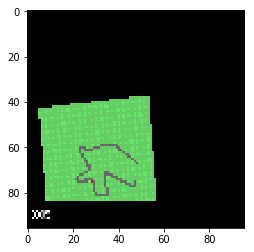

In [22]:
# show recorded frame that will be fed into the input of VAE
plt.imshow(frame[0])
plt.show()

In [23]:
batch_z = vae.encode(frame)
print(batch_z[0]) # print out sampled z
reconstruct = vae.decode(batch_z)

[ 0.1913 -0.5298  0.6625 -0.723  -1.7369  0.9029  0.0393  0.15    0.5288 -1.2082 -0.8454 -0.9386
  0.9815 -0.8582 -0.056   1.2092 -0.2738 -0.4115  0.2728 -0.1638  1.7734  0.6297  0.9155  1.4704
  2.6629 -0.053   0.4027  1.4112  0.2414  1.3493 -0.9522 -0.0355]


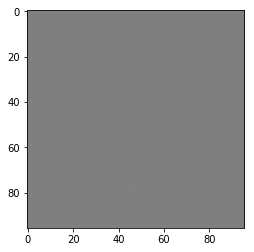

In [24]:
# show reconstruction
plt.imshow(reconstruct[0])
plt.show()